In [1]:
import sys

# add data folders to path
sys.path.insert(1, '../data')
sys.path.insert(1, '../src')
sys.path.insert(1, '../img')

In [2]:
ls ../data/rfcx-species-audio-detection/

sample_submission.csv  tfrecords/             train_fp.csv
test/                  train/                 train_tp.csv


# 1: Initial Exploration

Original dataset on Kaggle:
- [Rainforest Connection Species Audio Detection](https://www.kaggle.com/c/rfcx-species-audio-detection/data)    

Resources:
- [Add folders to path](https://askubuntu.com/questions/470982/how-to-add-a-python-module-to-syspath)
- [Learning from Audio: Fourier Transformations](https://towardsdatascience.com/learning-from-audio-fourier-transformations-f000124675ee) 
- [Intro to audio processing world for a Data scientist](https://medium.com/deepaffects/intro-to-audio-processing-world-for-a-data-scientist-b1a6ff19231d)  

- Numpy
    - [Check to see if two Numpy arrays are identical](https://www.kite.com/python/answers/how-to-compare-two-numpy-arrays-in-python#:~:text=Use%20np.,two%20NumPy%20arrays%20are%20equivalent.)  

Library documentation:
- [Soundfile](https://github.com/bastibe/python-soundfile)    
- [Librosa](https://librosa.org/doc/latest/index.html)  


## Imports

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# soundfile import
import soundfile as sf

# librosa imports
import librosa
import librosa.display

# for displaying playback
import IPython.display as ipd

## Convert one audio file to numpy array

- Soundfile library is capable of reading `.flac` files
- Each file is 60 seconds of 48k mono audio
- soundfile returns mono data as 1D numpy array

In [4]:
# check relative location for sample training audio file
! ls ../data/rfcx-species-audio-detection/train/003bec244.flac

../data/rfcx-species-audio-detection/train/003bec244.flac


### Soundfile test

In [5]:
# use soundfile to read in data as numpy array and confirm samplerate
test_filepath = '../data/rfcx-species-audio-detection/train/003bec244.flac'

sf_test, sf_samplerate = sf.read('../data/rfcx-species-audio-detection/train/003bec244.flac')

In [6]:
type(sf_test)

numpy.ndarray

In [7]:
# glance at data
sf_test

array([ 0.00830078,  0.02813721,  0.02468872, ...,  0.00021362,
       -0.00317383, -0.00430298])

In [8]:
# confirm sample rate of 48kbps
sf_samplerate

48000

In [9]:
# check shape. as the file is mono, this should be a 1D array
sf_test.shape

(2880000,)

In [10]:
# confirm file is 60 seconds of 48kbps mono audio
sf_test.shape[0]/48000

60.0

### Librosa test

In [11]:
librosa_test, sr = librosa.load('../data/rfcx-species-audio-detection/train/003bec244.flac',
                                sr=None)

In [12]:
type(librosa_test)

numpy.ndarray

In [13]:
librosa_test

array([ 0.00830078,  0.02813721,  0.02468872, ...,  0.00021362,
       -0.00317383, -0.00430298], dtype=float32)

In [14]:
sr

48000

In [15]:
# these two methods are equivalent
comparison = librosa_test == sf_test
comparison.all()

True

## Initial graphics

Resource:
- [Learning from Audio Fourier Transformations](https://towardsdatascience.com/learning-from-audio-fourier-transformations-f000124675ee) 

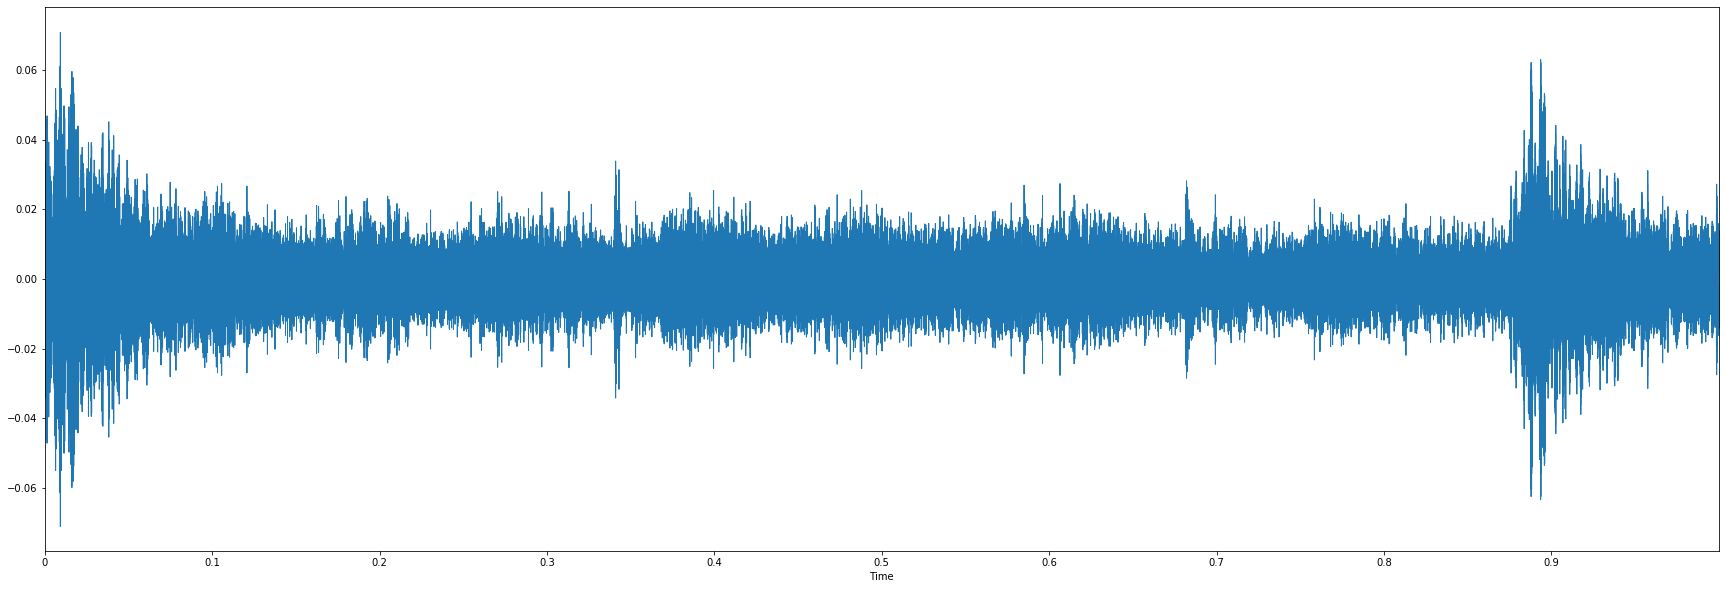

In [16]:
# Visualize waveform for first second

fig, ax = plt.subplots(1,1, figsize=(30, 10))

librosa.display.waveplot(librosa_test[:48000], sr=sr)
plt.show()

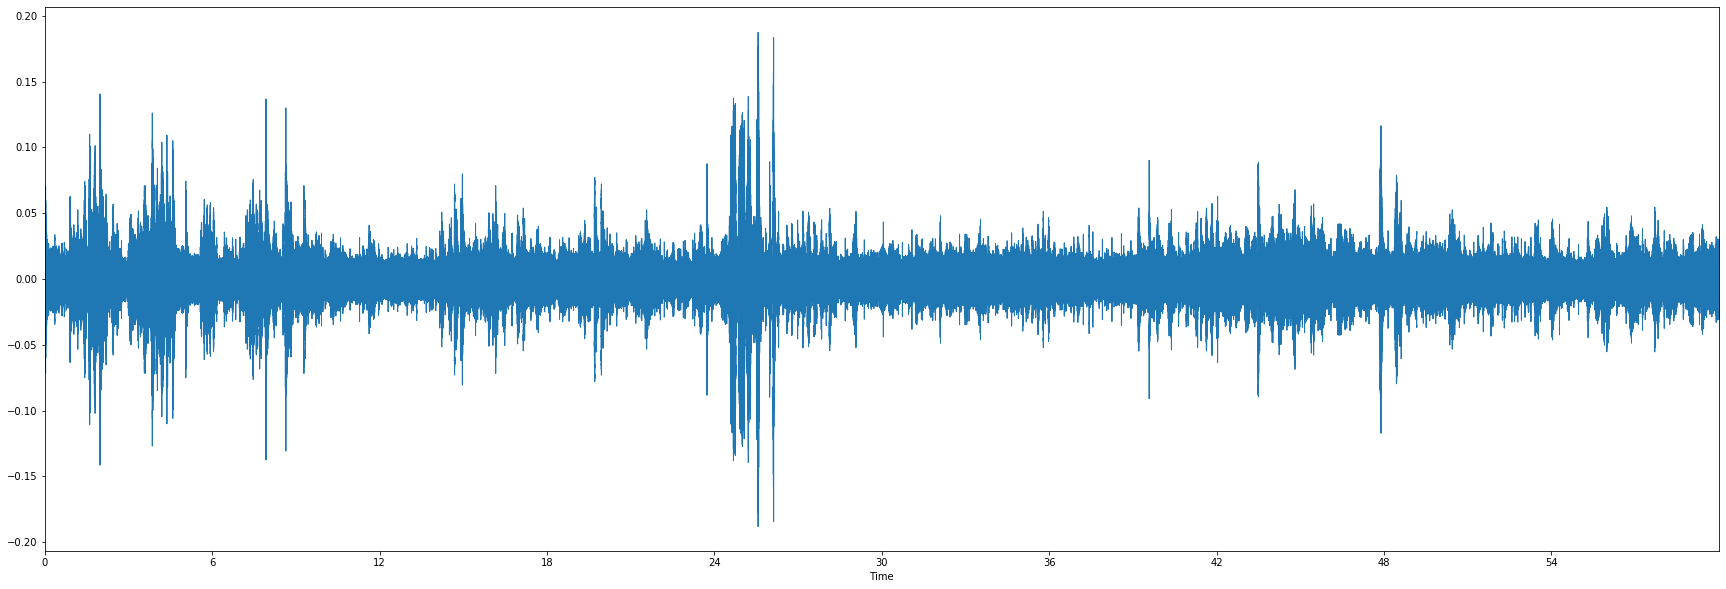

In [17]:
fig, ax = plt.subplots(1,1, figsize=(30, 10))

librosa.display.waveplot(librosa_test, sr=sr)

plt.show()

## Playback

In [18]:
# listen to full soundfile...
ipd.Audio(librosa_test, 
          rate=sr)

# True and False Positive Data

In [19]:
# 
# pd.read_csv

# ! ls ../data/rfcx-species-audio-detection/train_tp.csv

tp_path = '../data/rfcx-species-audio-detection/train_tp.csv'
fp_path = '../data/rfcx-species-audio-detection/train_fp.csv'

tp_df = pd.read_csv(tp_path)

In [20]:
tp_df

recording_id  species_id  songtype_id    t_min     f_min    t_max  \
0       003bec244          14            1  44.5440  2531.250  45.1307   
1       006ab765f          23            1  39.9615  7235.160  46.0452   
2       007f87ba2          12            1  39.1360   562.500  42.2720   
3       0099c367b          17            4  51.4206  1464.260  55.1996   
4       009b760e6          10            1  50.0854   947.461  52.5293   
...           ...         ...          ...      ...       ...      ...   
1211    fe8d9ac40          13            1  53.4720    93.750  54.0960   
1212    fea6b438a           4            1  43.5787  2531.250  45.7653   
1213    ff2eb9ce5           0            1  15.2267  5906.250  16.0213   
1214    ffb8d8391           5            1  14.3467  4781.250  16.6987   
1215    ffb9a7b9a          18            1  40.3200  3187.500  41.0133   

         f_max  
0      5531.25  
1     11283.40  
2      3281.25  
3      4565.04  
4     10852.70  
...        ...  
1211    843.75  
1212   4031.25  
1213   8250.00  
1214  10406.20  
1215   5062.50  

[1216 rows x 7 columns]

In [21]:
tp_df[tp_df['recording_id'] == '003bec244']  # 00204008d

recording_id  species_id  songtype_id   t_min    f_min    t_max    f_max
0    003bec244          14            1  44.544  2531.25  45.1307  5531.25

In [22]:
# 24 unique species_id, numbered 0-23
len(pd.unique(tp_df['species_id']))

24

In [23]:
# 2 unique songtype_id, 1 and 4
pd.unique(tp_df['songtype_id'])

array([1, 4])

In [24]:
tp_df[tp_df['species_id'] == 14]

recording_id  species_id  songtype_id    t_min    f_min    t_max    f_max
0       003bec244          14            1  44.5440  2531.25  45.1307  5531.25
30      055088446          14            1  58.9920  3750.00  59.2640  6468.75
87      1414bbe17          14            1  14.6453  3750.00  14.9173  6468.75
108     1679e323d          14            1   8.6773  2531.25   9.2640  5531.25
109     16ccddf71          14            1  51.8773  2812.50  52.8000  4406.25
111     16ffcf223          14            1  16.9973  2812.50  17.9200  4406.25
132     1aef4f8ff          14            1  47.1520  2531.25  47.7387  5531.25
133     1b77382c7          14            1  32.1493  3750.00  32.4213  6468.75
202     2a1bb0557          14            1   3.6960  3750.00   3.9680  6468.75
245     305ff00d1          14            1  49.8560  3750.00  50.1280  6468.75
323     42a7c4f08          14            1  30.5493  2812.50  31.4720  4406.25
325     42f4b8b64          14            1   3.1840  2812.50   4.1067  4406.25
337     45e58e08b          14            1  37.9307  2812.50  38.8533  4406.25
341     46c7db806          14            1  49.4720  2812.50  50.3947  4406.25
347     47f2eb3b8          14            1   8.5707  2812.50   9.4933  4406.25
405     55648ef63          14            1  53.8773  2812.50  54.8000  4406.25
414     561ed4362          14            1   0.0800  2531.25   0.6667  5531.25
504     644f71ae8          14            1  15.5787  2531.25  16.1653  5531.25
576     74c1043c9          14            1  56.0107  2531.25  56.5973  5531.25
581     75c8ccce9          14            1  12.5920  2531.25  13.1787  5531.25
627     7e370f1f3          14            1  46.0640  2531.25  46.6507  5531.25
628     7ed4d3ca1          14            1  17.9520  3750.00  18.2240  6468.75
658     8574d9e81          14            1  27.8720  2812.50  28.7947  4406.25
659     8593f9606          14            1  30.3840  2531.25  30.9707  5531.25
671     88186ba66          14            1  18.4373  2531.25  19.0240  5531.25
689     8dddf58e0          14            1  10.3520  2812.50  11.2747  4406.25
783     a4035e64b          14            1   7.1040  3750.00   7.3760  6468.75
832     af0113159          14            1  36.1547  2812.50  37.0773  4406.25
844     b1c09c89b          14            1  30.9493  3750.00  31.2213  6468.75
846     b1d18170a          14            1  59.0987  3750.00  59.3707  6468.75
876     b89bd05a1          14            1  44.4320  2812.50  45.3547  4406.25
922     c16b7270b          14            1  58.3520  3750.00  58.6240  6468.75
927     c271bc1ea          14            1  25.6640  2812.50  26.5867  4406.25
931     c39b2fcd3          14            1  29.2053  2812.50  30.1280  4406.25
951     c892aa78d          14            1  16.1333  3750.00  16.4053  6468.75
960     c9fc89429          14            1  39.3493  3750.00  39.6213  6468.75
1004    d3020850e          14            1  40.5387  2531.25  41.1253  5531.25
1014    d53f58786          14            1   3.7280  2531.25   4.3147  5531.25
1023    d5c4f55f4          14            1  34.7947  2812.50  35.7173  4406.25
1049    da329b0a5          14            1  52.0907  2812.50  53.0133  4406.25
1053    dabd22b08          14            1  28.4000  2812.50  29.3227  4406.25
1076    de80fb815          14            1  58.3573  2531.25  58.9440  5531.25
1086    e1a046050          14            1  39.5253  2812.50  40.4480  4406.25
1121    e8b209030          14            1   4.1493  2531.25   4.7360  5531.25
1124    e97de3f6d          14            1  56.6933  3750.00  56.9653  6468.75
1141    ec3a54dc6          14            1  38.7467  2531.25  39.3333  5531.25
1151    edd3b27d6          14            1  36.3413  2812.50  37.2640  4406.25
1162    efbfe6b39          14            1  23.2320  2812.50  24.1547  4406.25
1183    f702f163c          14            1  20.6880  3750.00  20.9600  6468.75
1197    fb3725395          14            1  54.1227  28

In [25]:
# time in seconds multiplied by sample rate

test_tp_in = int(tp_df.iloc[0]['t_min'] * sr)

test_tp_out = int(tp_df.iloc[0]['t_max'] * sr)

In [26]:
print(test_tp_in)
print(test_tp_out)

2138112
2166273


In [27]:
# listen to species_id 14, songtype_id 1 true positive
ipd.Audio(librosa_test[test_tp_in:test_tp_out + 1], 
          rate=sr,
          normalize=True)

Looking at these files:
- https://www.kaggle.com/kimdngngc/rainforest-audio-classification-tf-improved?select=train_tp.csv



# Pseudocode


For audio file in set of unique tp / fp files

- convert audio file to numpy array

- get sections of tp (or fp) for training

- 